In [8]:
#!pip3 install networkx
#!pip3 install git+https://github.com/hklarner/pyboolnet


import pyboolnet
import ast
from pyboolnet import file_exchange # load and write the network to file
from pyboolnet import interaction_graphs as ig # create the networkx graph
import networkx as nx
import matplotlib.pyplot as plt
from pyboolnet import state_transition_graphs as STGs # To get the state transition graphs
import random # to choose one succesor state
import numpy as np # to analyse the simulation
import matplotlib.pyplot as plt # to plot stuff
from pyboolnet import attractors as ad # To detect attractors



# Define the primes as a string
primes_string = """
{
    'X': [[{'X': 1}], [{'X': 0}]],  # Replace ["1"] and ["0"] with actual expressions if X is dependent on other nodes
    'Z_1': [[{'X': 1}], [{'X': 0}]],
    'Z_2': [[{'Z_1': 1}], [{'Z_1': 0}]],
    'Z_3': [[{'Z_2': 1}], [{'Z_2': 0}]],
}
"""

# Convert the string to a dictionary
primes = ast.literal_eval(primes_string)







In [9]:


initial_state = {'X': 0, 'Z_1': 0, 'Z_2': 0, 'Z_3': 0}



def simulate_network(primes, initial_state, steps):
    current_state = initial_state.copy()
    history = []

    for _ in range(steps):
        history.append(current_state.copy())
        next_states = STGs.successors_asynchronous(primes, current_state)  # Compute the next possible states, it is a list of possible states each one a dictionary
        # Choose one of the possible next states
        if next_states:
            current_state = random.choice(next_states)
        else:
            break  # No more transitions possible
        #current_state = STGs.successors_asynchronous(primes, current_state)
        #current_state = next_state if isinstance(next_state, dict) else dict(next_state) # Update current_state for the next iteration. Make sure current stat is a dictionary as expected by successors_asynchronous


    return history

In [10]:
steps = 100  # You can adjust the number of steps
simulation_history = simulate_network(primes, initial_state, steps)

In [11]:
for i, state in enumerate(simulation_history):
    print(f"Step {i}: {state}")

Step 0: {'X': 0, 'Z_1': 0, 'Z_2': 0, 'Z_3': 0}
Step 1: {'X': 0, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 2: {'X': 0, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 3: {'X': 1, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 4: {'X': 1, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 5: {'X': 0, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 6: {'X': 1, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 7: {'X': 0, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 8: {'X': 0, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 9: {'X': 1, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 10: {'X': 0, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 11: {'X': 1, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 12: {'X': 0, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 13: {'X': 1, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 14: {'X': 1, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 15: {'X': 0, 'Z_1': 0, 'Z_2': 1, 'Z_3': 0}
Step 16: {'X': 0, 'Z_1': 1, 'Z_2': 1, 'Z_3': 0}
Step 17: {'X': 0, 'Z_1': 1, 'Z_2': 0, 'Z_3': 0}
Step 18: {'X': 1, 'Z_1': 1, 'Z_2': 0, 'Z_3': 0}
Step 19: {'X': 1, 'Z_1': 1, 'Z_2': 0, 'Z_3': 1}
Step 20: {'X': 1, 'Z_1': 0, 'Z_2': 0, 'Z_3': 1}
St

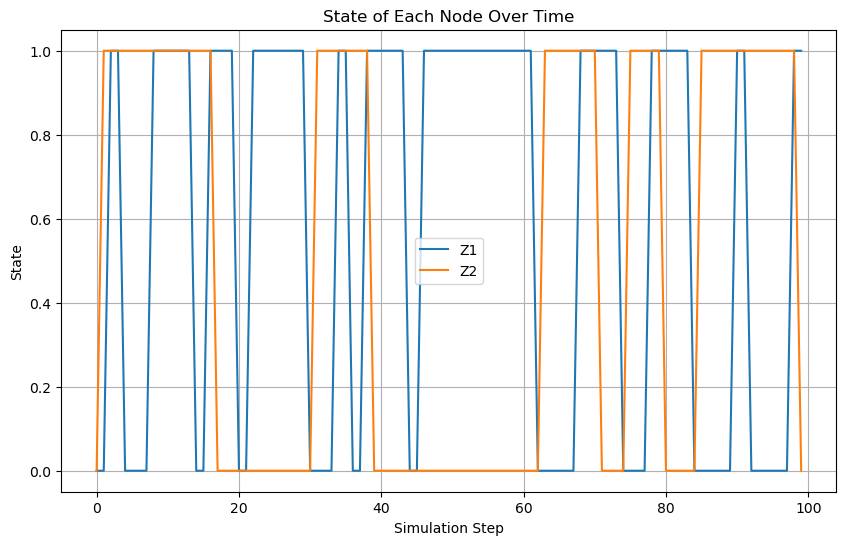

In [16]:
# Assuming 'history' is your list of states from the simulation
steps = range(len(simulation_history))
states_X = [state['X'] for state in simulation_history]
states_Z1 = [state['Z_1'] for state in simulation_history]
states_Z2 = [state['Z_2'] for state in simulation_history]
states_Z3 = [state['Z_3'] for state in simulation_history]

plt.figure(figsize=(10, 6))
#plt.plot(steps, states_X, label='X')
plt.plot(steps, states_Z1, label='Z1')
plt.plot(steps, states_Z2, label='Z2')
#plt.plot(steps, states_Z3, label='Z3')

plt.xlabel('Simulation Step')
plt.ylabel('State')
plt.title('State of Each Node Over Time')
plt.legend()
plt.grid(True)
plt.show()